In [1]:
import re
import numpy as np
from nltk import ngrams
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Transformacija arapskog karaktera u njegovu latinizovanu verziju

In [2]:
def transform_character(character):
    transformation = {
        'ء': ' ',
        'ا': 'a',
        'ب': 'b',
        'ت': 't',
        'ث': 'θ',
        'ج': 'j',
        'ح': '7',
        'خ': '5',
        'د': 'd',
        'ذ': 'δ',
        'ر': 'r',
        'ز': 'z',
        'س': 's',
        'ش': 'š',
        'ص': 'S',
        'ض': 'D',
        'ط': 'T',
        'ظ': 'Z',
        'ع': '3',
        'غ': 'γ',
        'ف': 'f',
        'ﻓ': 'f',
        'ق': 'q',
        'ك': 'k',
        'ک': 'k',
        'ل': 'l',
        'م': 'm',
        'ن': 'n',
        'ه': 'h',
        'ہ': 'h',
        'و': 'w',
        'ي': 'i',

        ' ': ' ',

        'آ': 'a',
        'ة': 'a',
        'ى': 'a',
        'ئ': 'a',
        'ؤ': 'w',
        'أ': 'a',
        'إ': 'i',
        'ـ': ' ',
        'ۆ': 'w',
        'گ': 'g',
        'ٱ': 'a',
        'ﻠ': 'l',
        'ﻲ': 'i',
        'ﻋ': ' ',
        'ﺸ': 'š',
        'ﻥ': 'n',
        'ﻏ': 'γ',
        'ﻴ': 'i',
        'ﺮ': 'r',
        'ﻙ': 'k',
        'ﺎ': 'a',
        'ﻧ': 'n',
        'ﻔ': 'f',
        'ﺴ': 's',
        'ﻪ': 'h',
        'ﻳ': 'i',
        'ﻘ': 'q',
        'ﻮ': 'w',
        'ﻻ': "la",
        'ﻹ': "la",
        'ﺼ': 'S',
        'ﻩ': 'h',
        'ﺒ': 'b',
        'ﻗ': 'q',
        'ﻦ': 'n',
        'ﻡ': 'm',
        'ﻣ': 'm',
        'ﺻ': 'S',
        'ﻨ': 'n',
        'ﻃ': 'T',
        'ﻭ': 'w',
        'ﻚ': 'k',
        'ﺗ': 't',
        'ﻫ': 'h',
        'ﻤ': 'm',
        'ﺟ': 'j',
        'ﺐ': 'b',
        'ﻟ': 'l',
        'ﺍ': 'a',
        'ﻞ': 'l',
        'ﻀ': 'D',
        'ﺑ': 'b',
        'ﺳ': 's',
        'ﺘ': 't',
        'ﺭ': 'r',
        'ﺷ': 'š',
        'ﺣ': '7',
        'ﻑ': 'f',
        'ﻌ': '3',
        'ﺰ': 'z',
        'ﺕ': 't',
        'ﺤ': '7',
        'ﺪ': 'd',
        'ﺩ': 'd',
        'ﺖ': 't',
        'ﻯ': 'i',
        'ﻷ': "la"
    }
    if character == '\ufeff':
        return ' '
    elif transformation.get(character) is None:
        return ' '
    else:
        return transformation[character]

Transformacija arapskog teksta u latinični

In [3]:
def generate_latin_text(raw_data):
    formatted_data = re.sub(r"\s+", ' ', raw_data)
    formatted_data = re.sub(r"[0-9A-Za-z\"()،,\.:!?؟]", "", formatted_data)
    char_array = list(formatted_data.strip())
    char_array = list(map(lambda x: transform_character(x), char_array))
    result = "".join(char_array)
    result = re.sub(r"\s+", ' ', result.strip())
    return result

Generisanje 3gram vektora na osnovu ulaznog teksta

In [4]:
def generate_3gram_model(input_text):
    charset = {
        'T': 0,
        'S': 1,
        'γ': 2,
        'f': 3,
        'š': 4,
        '3': 5,
        'r': 6,
        'D': 7,
        'a': 8,
        'q': 9,
        'b': 10,
        '7': 11,
        'd': 12,
        'w': 13,
        'h': 14,
        'n': 15,
        'θ': 16,
        'z': 17,
        'Z': 18,
        'j': 19,
        's': 20,
        'g': 21,
        'i': 22,
        'k': 23,
        '5': 24,
        'δ': 25,
        ' ': 26,
        'm': 27,
        't': 28,
        'l': 29,
    }
    m = len(charset)
    vector = np.zeros(m*m*m, dtype=np.int64)
    grams = ngrams(input_text, 3)
    for gram in grams:
        index = [charset[gram[0]], charset[gram[1]], charset[gram[2]]]
        vector[index[0]*m*m + index[1]*m + index[2]] += 1
    return vector

Učitavanje pozitivnih tvitova

In [5]:
    positive_texts = []
    for i in range(1000):
        with open("Positive/positive" + str(i+1) + ".txt", 'r', encoding='utf-8') as input_file:
            raw_data = input_file.read()
            positive_texts.append(generate_latin_text(raw_data))
    positive_texts = list(filter(lambda x: len(x) >= 3, positive_texts))
    positive_vectors = list(map(lambda x: generate_3gram_model(x), positive_texts))

Učitavanje negativnih tvitova

In [6]:
    negative_texts = []
    for i in range(1000):
        if i in {102, 115, 175, 177, 179, 183, 185, 188, 190}:
            continue
        with open("Negative/negative" + str(i+1) + ".txt", 'r', encoding='utf-8') as input_file:
            raw_data = input_file.read()
            negative_texts.append(generate_latin_text(raw_data))
    negative_texts = list(filter(lambda x: len(x) >= 3, negative_texts))
    negative_vectors = list(map(lambda x: generate_3gram_model(x), negative_texts))

Formiranje matrice atributa i klasnog vektora

In [7]:
    data_matrix = np.vstack((np.array(positive_vectors), np.array(negative_vectors)))
    class_vector = np.vstack((np.ones(len(positive_vectors)).reshape((-1, 1)),
                              np.zeros(len(negative_vectors)).reshape(-1, 1)))
    print(data_matrix)
    print(class_vector)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


Podela skupa podataka u trening i test skupove

In [8]:
train_x, test_x, train_y, test_y = \
        train_test_split(data_matrix, class_vector, test_size=0.7, random_state=8, stratify=class_vector)

Formiranje modela

In [9]:
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer((27000, )))
    model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=[tf.keras.metrics.binary_accuracy])

    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6912256   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 6,912,513
Trainable params: 6,912,513
Non-trainable params: 0
_________________________________________________________________


Treniranje i evaluacija modela

Train on 476 samples, validate on 119 samples
Epoch 1/4
476/476 [==============================] - 2s 4ms/sample - loss: 0.6420 - binary_accuracy: 0.6324 - val_loss: 0.5640 - val_binary_accuracy: 0.8067
Epoch 2/4
476/476 [==============================] - 1s 2ms/sample - loss: 0.4720 - binary_accuracy: 0.9118 - val_loss: 0.5336 - val_binary_accuracy: 0.7311
Epoch 3/4
476/476 [==============================] - 1s 2ms/sample - loss: 0.3791 - binary_accuracy: 0.9622 - val_loss: 0.4920 - val_binary_accuracy: 0.8571
Epoch 4/4
1389/1389 [==============================] - 1s 555us/sample - loss: 0.4592 - binary_accuracy: 0.8229
[0.45920435051166214, 0.82289416]


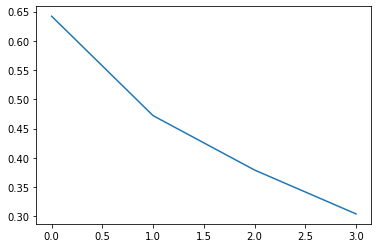

In [10]:
    hist = model.fit(train_x, train_y, batch_size=32, epochs=4, validation_split=0.2, verbose=1)
    result = model.evaluate(test_x, test_y, batch_size=32)
    print(result)

    plt.plot(hist.history['loss'])
    plt.show()

Štampanje matrice konfuzije

In [11]:
    predicted_y = model.predict_classes(test_x)
    print(accuracy_score(test_y, predicted_y))
    print(confusion_matrix(test_y, predicted_y))

0.8228941684665226
[[587 102]
 [144 556]]


Klasifikacija tvitova koji se ne nalaze u početnom datasetu

In [12]:
    neg1 = generate_3gram_model(generate_latin_text("ستظل تبحث طول عمرك عن إمراه تشبهني سترجع خائب كخيبة يتيم فقد ابويه في حادث شنيع كخيبة الامان الذي فقدته برحيلي 😤"))
    pos1 = generate_3gram_model(generate_latin_text(
        "صباحكم كيتا 🤙 صباحكم أليسون 💪 صباحكم ڤان دايك 👊 صباحكم جوله من دون خسارة ✌ ️ نقطة من اصل نقطة 👍 أقوى دفاع بدخول"))
    print(model.predict_classes(np.array((pos1, neg1))))

[[1]
 [0]]
